# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [2]:
#прочитаем файл и возьмем рандомно 5 строк, сводную информацию по каждому столбцу и общую информацию,
#чтобы наглядно посмотреть, с чем работать
import pandas as pd
df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
df.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
7966,9,6500000.0,105.0,2015-03-11T00:00:00,4,2.60,9.0,60.00,6,NaN,...,10.50,0.0,Санкт-Петербург,21292.0,12736.0,3.0,666.0,1.0,462.0,834.0
852,14,5900000.0,42.0,2019-03-08T00:00:00,1,2.80,16.0,19.00,15,NaN,...,12.00,2.0,Санкт-Петербург,10069.0,13445.0,0.0,NaN,0.0,NaN,NaN
21446,2,9016000.0,78.4,2016-02-04T00:00:00,3,2.60,25.0,45.18,2,NaN,...,10.72,0.0,Санкт-Петербург,43396.0,12153.0,0.0,NaN,0.0,NaN,159.0
18616,12,9700000.0,146.0,2015-09-18T00:00:00,4,3.37,3.0,104.00,2,NaN,...,11.50,NaN,Санкт-Петербург,21813.0,1970.0,3.0,431.0,2.0,75.0,886.0
12669,10,5100000.0,45.0,2018-04-04T00:00:00,1,NaN,5.0,NaN,2,NaN,...,NaN,NaN,Санкт-Петербург,33506.0,13892.0,0.0,NaN,2.0,175.0,59.0


In [3]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

По сводной таблице видим, что есть очень много пропущенных значений.
Есть некорректные типы данных.
В названии населенных пунктов разный регистр.

Необходимо изучить все пропущенные значения, причину их происхождения и , где возможно, заполнить пропуски. Также привести данные к нужному типу для работы. Проверить на дубли.


 Проверим количество пропущенных значений в каждом столбце

In [5]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

выведем в процентном соотношении и отсортируем по возрастанию для большей наглядности

In [6]:
(df.isnull().sum().sort_values()/df.shape[0]*100).reset_index().round(2)

,index,0
0,total_images,0.00
1,open_plan,0.00
2,floor,0.00
3,rooms,0.00
4,studio,0.00
5,total_area,0.00
6,last_price,0.00
7,first_day_exposition,0.00
8,locality_name,0.21
9,floors_total,0.36


In [7]:
(df.isnull().sum().sort_values()/df.shape[0]*100).reset_index().round(2)

,index,0
0,total_images,0.00
1,open_plan,0.00
2,floor,0.00
3,rooms,0.00
4,studio,0.00
5,total_area,0.00
6,last_price,0.00
7,first_day_exposition,0.00
8,locality_name,0.21
9,floors_total,0.36


посмотрим каждый столбец с 0 значениями

Пропуски в названии населенного пункта составляют меньше 1%. Удалим эти значения, по той причине, что мы даже понятия не имеем, где находится объект и принимать его значения не целесообразно. Заполнять тоже не думаю правильным. Да и это одно из целевых знчений при выборе квартиры. Тем более, мы рассмативаем довольно таки большую область и разница в расположении может быть больше 100 км, например.

In [8]:
df= df.dropna(subset = ['locality_name'])
df['locality_name'].isnull().sum()

0

Посмотрим, сколько всего у нас уникальных значений названий населенных пунктов и , так как это строковый тип, приведем сразу к одному регистру, чтобы избежать дубли.

In [9]:
df['locality_name'] = df['locality_name'].str.lower()

In [10]:
df['locality_name'].value_counts()

санкт-петербург           15721
посёлок мурино              522
посёлок шушары              440
всеволожск                  398
пушкин                      369
                          ...  
поселок перово                1
поселок красносельское        1
деревня котлы                 1
поселок севастьяново          1
деревня кисельня              1
Name: locality_name, Length: 364, dtype: int64

Наглядно видно, что есть поселок с буквой Ё, а есть с Е. Поменяем вмсе Ё на Е.

In [11]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е', regex=True)

In [12]:
df['locality_name'].value_counts()

санкт-петербург           15721
поселок мурино              556
поселок шушары              440
всеволожск                  398
пушкин                      369
                          ...  
деревня пустынка              1
поселок цвылево               1
поселок калитино              1
поселок высокоключевой        1
поселок дружноселье           1
Name: locality_name, Length: 330, dtype: int64

На 34 уникальных значений стало меньше.

У нас есть такая информация, как наличие парков и водоемов вокруг и расстояние до них. В этих столбцах мы также имеет пропущенные значения, но менять их не буду, по той причине, что у нас в целях нет вопроса о зависимости от этих факторов. Возможно, люди просто не знают данную информацию и поэтому оставили пустой. заполнять чем-либо не вижу смысла.

По столбцу апартаментов практически 88% пустые, посмотрим подробнее

In [13]:
df['is_apartment'].describe()

count      2760
unique        2
top       False
freq       2710
Name: is_apartment, dtype: object

In [14]:
df['is_apartment'].value_counts()

False    2710
True       50
Name: is_apartment, dtype: int64

Если в пропущенных значениях апартаментов есть жилая площадь, значит это говорит о том, что объекты не являются апартаментами в любом случае. Как мы видим, пропусков в наличии жилой площади значительно меньше, поэтому заменим пропущенные значения в столбе апартов на 0 и приведем к цийровому типу, где True = 1 и False = 0

In [15]:
df['is_apartment'] = df['is_apartment'].map({True: 1, False: 0})

In [16]:
df['is_apartment'] = df['is_apartment'].fillna(0)

In [17]:
df['is_apartment'].isnull().sum()

0

По столбцу с количеством балконов. Думаю, пропущены значения по той причине, что их просто нет. посмотрим информацию по столбу и заменим пропуски на 0.

In [18]:
df['balcony'].value_counts() 

1.0    4187
0.0    3725
2.0    3658
5.0     304
4.0     182
3.0      81
Name: balcony, dtype: int64

In [19]:
df['balcony'] = df['balcony'].fillna(0)

Столбцы с расстоянием до аэропорта и до центра города тоже не вижу смысла заполнять, как и высоту потолков. Мы не можем дать заведомо неверные сюда обозначения, так как они критически повлияют на результат. Возможно, они не хаполнены по незнанию этих значений. И не знаем, что берется за центр города - центр в самом населенном пункте или областной центра Санкт-Петербург? Это и касается площади - количество не критичное пропусков, не будем заполнять. С площадью возможно еще не установлена планировка и соотвественно нельзя посчитать жилую площадь.Поэтому, думаю с пропусками на этом закончить. Теперь у нас есть 2 столбца с датой, нужно привести их к необходимому формату.

In [20]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S")

Проверим на дубли и при их наличии удалим

In [21]:
df.duplicated().sum()

0

In [22]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23650.000000,2.365000e+04,23650.000000,23650.000000,14490.000000,23565.000000,21752.000000,23650.000000,23650.000000,21381.000000,23650.000000,18116.000000,18139.000000,18140.000000,8064.000000,18140.000000,9085.000000,20470.000000
mean,9.862326,6.541127e+06,60.329069,2.070106,2.771287,10.675875,34.448356,5.893277,0.002114,10.566403,0.591712,28803.225878,14197.860742,0.611577,490.830729,0.769680,518.059879,180.753200
std,5.682278,1.089640e+07,35.661808,1.078620,1.261593,6.594823,22.037664,4.883317,0.045932,5.901753,0.959662,12637.314144,8606.830295,0.802003,342.554386,0.937948,277.841733,219.777916
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,0.000000,7.000000,0.000000,18575.750000,9241.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,0.000000,9.100000,0.000000,26756.500000,13105.000000,0.000000,454.500000,1.000000,502.000000,95.000000
75%,14.000000,6.799000e+06,69.700000,3.000000,2.800000,16.000000,42.300000,8.000000,0.000000,12.000000,1.000000,37294.000000,16293.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,1.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null datetime64[ns]
rooms                   23650 non-null int64
ceiling_height          14490 non-null float64
floors_total            23565 non-null float64
living_area             21752 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null float64
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            21381 non-null float64
balcony                 23650 non-null float64
locality_name           23650 non-null object
airports_nearest        18116 non-null float64
cityCenters_nearest     18139 non-null float64
parks_around3000        18140 non-null float64
parks_nearest           8064 non-null float64
ponds

Форматы везде приведены к необходимому, дубликатов нет, пропуски, где возможно заполнены

### Шаг 3. Посчитайте и добавьте в таблицу

Посчитаем цену квадратного метра. Для этого общую цену разделим на общую площадь и добавим новый столбец, назовем его price_m. Делить будем без остатка и получим целые цисла- цифры после запятой в цене не критичны

In [24]:
df['price_m'] = df['last_price'] // df['total_area']

Добавим столбцы с днем, месяцем и годом

In [25]:
df['day_exposition'] = df['first_day_exposition'].dt.day_name()
df['month_exposition'] = df['first_day_exposition'].dt.month_name()
df['year_exposition'] = df['first_day_exposition'].dt.year

И этаж квартиры : первый, последний и другой. Воспользуемся категоризацией

In [26]:
def floor_name(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
df['floor_name'] = df.apply(floor_name, axis=1)

Добавим сотношение жилой к общей площади( ratio_living), и отношение кухни к общей(kitchen_ratio)

In [27]:
df['ratio_living'] = df['living_area'] / df['total_area']
df['ratio_kitchen'] = df['kitchen_area'] / df['total_area']

In [28]:
df.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_m,day_exposition,month_exposition,year_exposition,floor_name,ratio_living,ratio_kitchen
2944,16,3690000.0,37.7,2018-11-18,1,2.55,10.0,17.1,8,0.0,...,1.0,919.0,3.0,97877.0,Sunday,November,2018,другой,0.453581,0.230769
17048,7,4000000.0,45.9,2019-03-21,2,2.50,5.0,30.8,1,0.0,...,0.0,NaN,NaN,87145.0,Thursday,March,2019,первый,0.671024,0.141612
13340,20,8500000.0,90.2,2018-10-05,3,NaN,17.0,47.7,16,0.0,...,3.0,439.0,138.0,94235.0,Friday,October,2018,другой,0.528825,0.221729
17320,0,1720000.0,42.0,2017-12-09,2,NaN,5.0,24.0,4,0.0,...,NaN,NaN,45.0,40952.0,Saturday,December,2017,другой,0.571429,0.154762
15830,7,2900000.0,35.0,2017-11-11,1,2.70,15.0,17.0,1,0.0,...,NaN,NaN,115.0,82857.0,Saturday,November,2017,первый,0.485714,0.257143
2149,20,4700000.0,48.5,2018-08-28,2,2.60,12.0,28.6,4,0.0,...,0.0,NaN,7.0,96907.0,Tuesday,August,2018,другой,0.589691,0.158763
5145,9,2950000.0,44.7,2018-10-21,2,2.60,9.0,26.3,8,0.0,...,NaN,NaN,15.0,65995.0,Sunday,October,2018,другой,0.588367,0.185682
5256,1,6600000.0,50.1,2019-03-12,2,2.50,14.0,26.6,7,0.0,...,0.0,NaN,NaN,131736.0,Tuesday,March,2019,другой,0.530938,NaN
16777,15,7200000.0,66.7,2017-09-27,3,NaN,9.0,42.5,2,0.0,...,0.0,NaN,12.0,107946.0,Wednesday,September,2017,другой,0.637181,0.143928
4737,17,3450000.0,31.5,2018-03-31,1,2.50,14.0,18.9,6,0.0,...,1.0,686.0,171.0,109523.0,Saturday,March,2018,другой,0.600000,NaN


### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

Задание:
Изучите следующие параметры : площадь, цена, число комнат и высота потолковю Постройте гистограммы для каждого параметра;
Уберите редкие и выбивающиеся значения, опишите, какие особенности обнаружили.

Для работы с гистограммами и графиками выгрузим библиотеку

In [29]:
import matplotlib.pyplot as plt

Построим диаграммы для таких столбцов, как площадь, цена число комнат и высота потолков

In [30]:
df['total_area'].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

Text(0.5, 1.0, 'Гистограмма распределения площади продаваемых квартир')

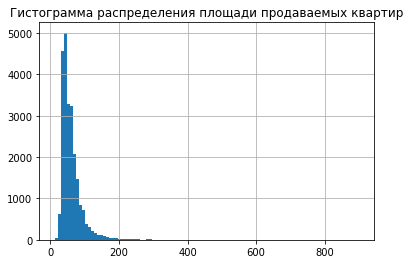

In [31]:

df['total_area'].hist(bins = 100, range = (12, 900))
plt.title('Гистограмма распределения площади продаваемых квартир')

#взяли максимум и минимум значения, чтобы выставить параметры range

Видим, что основная масса сосредоточена в районе 70-100 квадратов и , начиная с 200, выше значения являются редкостью. И также максимальное значение 900 похоже на выброс. Удалим выбросы, используя квартили и диаграмму размаха. Так как у нас несколько параметров исследования, напишем сразу функцию для удаления выбросов

In [32]:
"""Эта функция избаляет значения от выбросов"""
def delete_outliers(df, column,graphic=0,x=10,y=10):
    q1 = df[column].quantile(0.25)                 
    q2 = df[column].quantile(0.75)
    iqr = q2 - q1
    good = (df[column] >= (q1 - 1.5*iqr)) & (df[column] <= (q2 + 1.5*iqr))
    if graphic == 1:
        return df.loc[good].hist([column],bins = 100, figsize=(x,y))
    else:
        return df.loc[good]

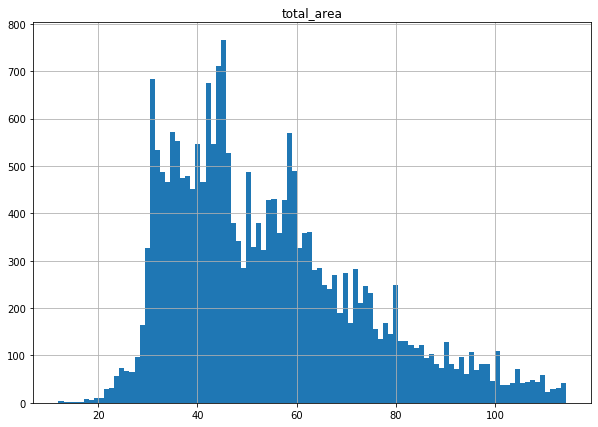

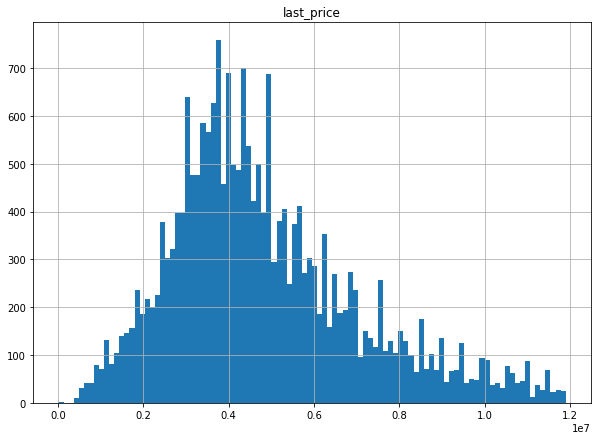

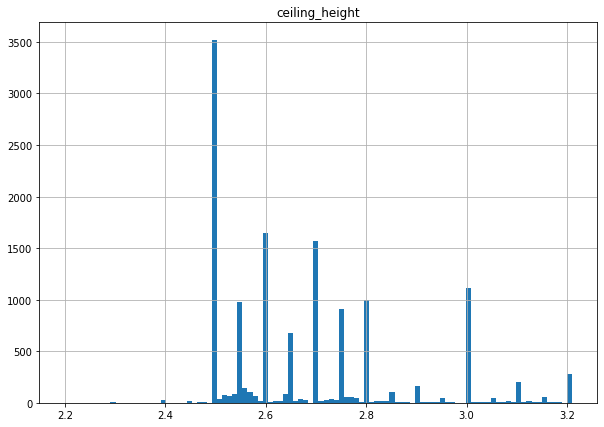

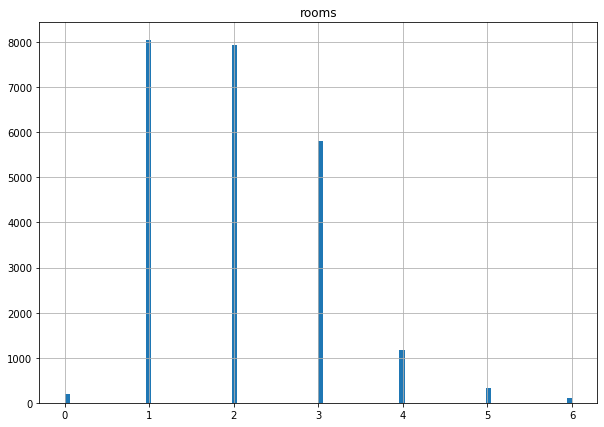

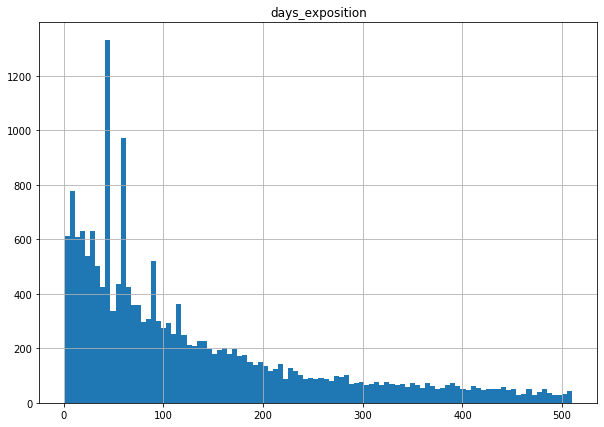

In [33]:
#Теперь построим графики распределения на интересующие нас столбцы
pr = df[['total_area', 'last_price', 'ceiling_height', 'rooms','days_exposition']]
for count in pr:
    delete_outliers(pr,count,1, 10, 7)

In [34]:
#сохраним в переменной good_total_area значения без выбросов
good_total_area = delete_outliers(df,'total_area',0)['total_area']
good_total_area.describe()

count    22406.000000
mean        54.325685
std         19.349559
min         12.000000
25%         39.400000
50%         50.100000
75%         65.500000
max        114.200000
Name: total_area, dtype: float64

Убрав выбивающиеся значения, мы не сильно изменили медиану, но при этом среднее значение уменьшилось значительно и картина стала более ясной и наглядной - большая часть в диапозоне от 30 до 50 квадратов, чем больше квадратура, тем меньше предложений

In [35]:
#Рассмотрим аналогично цену
df['last_price'].describe()

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [36]:
good_last_price = delete_outliers(df,'last_price',0)['last_price']
good_last_price.describe()

count    2.159500e+04
mean     4.838942e+06
std      2.217282e+06
min      1.219000e+04
25%      3.300000e+06
50%      4.400000e+06
75%      6.000000e+06
max      1.189440e+07
Name: last_price, dtype: float64

Значительно поменялись значения средней цены, а это немаловажный факт при анализе недвижимости на рынке. Возможно, предыдущие данные обусловленны случайным добавлением лишних нулей( цифр много, неверно посчитали). Аналогично и с квадратными метрами

In [37]:
#построим гистограмму числа комнат
df['rooms'].describe()

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [38]:
good_rooms = delete_outliers(df,'rooms',0)['rooms']
good_rooms.describe()

count    23560.000000
mean         2.047326
std          1.006837
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

Так намного лучше, мы видим, что в основном продают 1,2 комнатные квартиры. О значение не считаю артефактом -  у нас есть апартаменты, которые в целом не считаются комнатой, а пространство, которое предпособлено для жилья. Поэтому в данном случае, 0 значения имеют место быть.

In [39]:
#высота потолка
df['ceiling_height'].describe()

count    14490.000000
mean         2.771287
std          1.261593
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [40]:
good_ceiling_height = delete_outliers(df,'ceiling_height',0)['ceiling_height']
good_ceiling_height.describe()

count    13664.000000
mean         2.679857
std          0.184020
min          2.200000
25%          2.500000
50%          2.640000
75%          2.760000
max          3.210000
Name: ceiling_height, dtype: float64

Потолки до 2.5 метров могут просто находится в мансардных помещениях. В целом, основная масса имеет 2.4-2.8 метров.

Задание:
Изучите время продажи квартиры, Постройте гистограмму. Посчитайте среднюю и медиану, Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли быстро, а когда необычайно долго?

In [41]:
df['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Из полученных значений мы видим, что медианное и среднее значение отличается в 2 раза! Так как и тут мы имеем артефакты - квартиры, которые продавались больше 2.5 лет в небольшом, точечном количестве, но , конечно, они перетгивают среднюю.Для начала уберем артефакты 

In [42]:
good_days_exposition = delete_outliers(df,'days_exposition',0)['days_exposition']
good_days_exposition.describe()

count    18796.000000
mean       128.398117
std        121.153672
min          1.000000
25%         41.000000
50%         85.000000
75%        182.000000
max        510.000000
Name: days_exposition, dtype: float64

По гистограмме мы видим, что большая часть квартир продается быстро, до 3 месяцев. Но есть выбивающиеся значения. Какое количество дней публикации преобладает над всеми

In [43]:
good_days_exposition.value_counts()

45.0     879
60.0     538
7.0      234
30.0     208
90.0     203
        ... 
508.0      3
2.0        3
486.0      3
373.0      3
1.0        1
Name: days_exposition, Length: 510, dtype: int64

есть тенденция : неделя, месяц, 1.5 месяца , 2 и 3. Возможно, что квартиры продали раньше, просто есть какие то дни, когда чистится база. Допустим, раз в месяц снимают все неакруальные обьявления. Или объявление было платным и куплено размещение на определенный срок. Но можем сделать вывод, что продажа до 1 недели - это быстрая продажа и она занимает довольно такие высокую позицию.В среднем продаются квартиры от 1 месяца до 3. От 6 мес можно уже считать долгой продажей. А необычайно долгая - от года и более. Но чем больше срок, тем меньше значений, то есть тенденция идет к быстрым продажам.

Задача:
Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.


In [44]:
#Построим граффик корреляции:
df[['price_m','total_area','rooms','days_exposition','cityCenters_nearest']].corr()

,price_m,total_area,rooms,days_exposition,cityCenters_nearest
price_m,1.000000,0.302202,0.055470,0.047710,-0.318099
total_area,0.302202,1.000000,0.758745,0.149571,-0.231904
rooms,0.055470,0.758745,1.000000,0.126497,-0.184322
days_exposition,0.047710,0.149571,0.126497,1.000000,-0.059481
cityCenters_nearest,-0.318099,-0.231904,-0.184322,-0.059481,1.000000


Визуализируем с помощью scatter графика:

Text(0.5, 1.0, 'Матрица рассеивания')

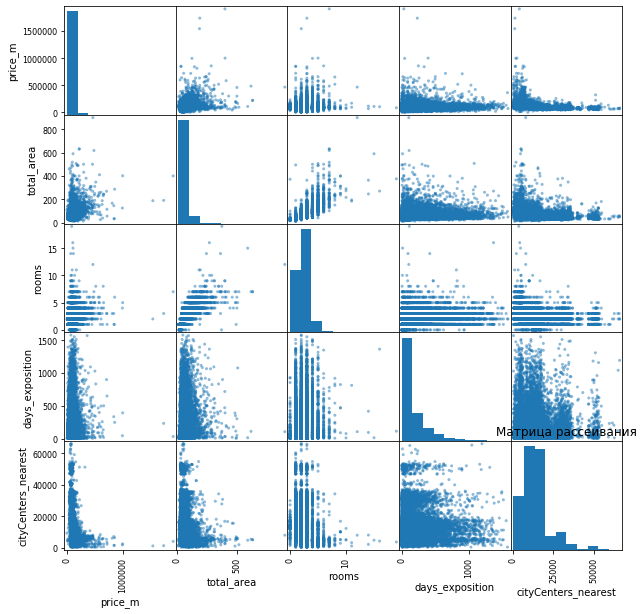

In [45]:
pd.plotting.scatter_matrix(df[['price_m','total_area','rooms','days_exposition','cityCenters_nearest']], figsize =(10,10))
plt.title('Матрица рассеивания')

Цена в большей степени зависит от общей площади и от расстояния до центра - чем дальше от центра, тем ниже цена.

Text(0.5, 1.0, 'зависимость цены от дня публикации')

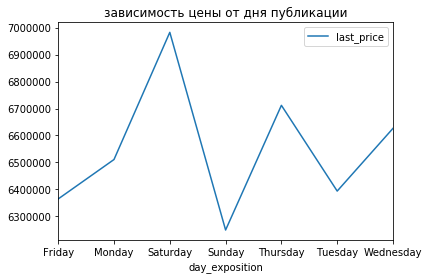

In [46]:
df.pivot_table(index = 'day_exposition', values = 'last_price').plot()
plt.title('зависимость цены от дня публикации')

Text(0.5, 1.0, 'зависимость цены от месяца публикации')

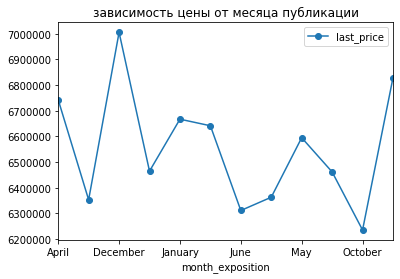

In [47]:
df.pivot_table(index = 'month_exposition', values = 'last_price').plot(style ='-o')
plt.title('зависимость цены от месяца публикации')

Text(0.5, 1.0, 'зависимость цены от года публикации')

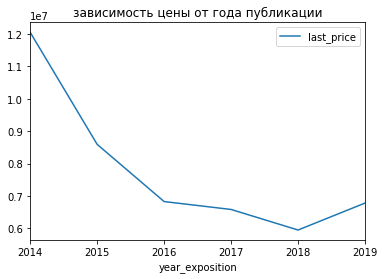

In [48]:
df.pivot_table(index = 'year_exposition', values = 'last_price').plot()
plt.title('зависимость цены от года публикации')

От дней недели зависит скорее не цена, а количество публикаций. Ближе к выходным публикаций больше - люди свободны от работы и могут заняться поиском квартир. К началу недели заметно падает количество. 

От месяца - все примерно на одном уровне, но интересно, что в июне сильное проседание в цене. Возможно, появляется много предложений "дачных" вариантов, соотвественно дешевле.

Есть прямая зависимость от года, а точнее, от экономической ситуации в стране. Мы видим резкое падение в конце 2016 ( существенное повышение курса доллара и повышение ставки по ипотеке (около 12-15%). Спрос на жилье упал.). 
Делаю вывод, что цена в меньшей степени зависит от дня недели и месяца, а напрямую зависит от года, а точнее от экономической ситуации в Стране.

Text(0.5, 1.0, 'зависимость цены от этажа')

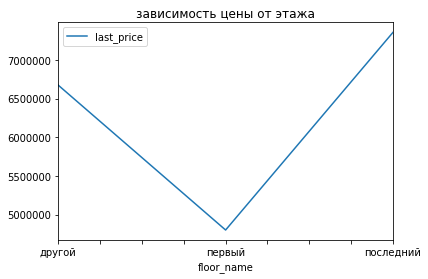

In [49]:
df.pivot_table(index = 'floor_name', values = 'last_price').plot()
plt.title('зависимость цены от этажа')

Самые дешевые квартиры на 1 этаже. Есть предположение, что часть объявлений с 1этажными домами. Они, как правило, находятся не в черте города, а область. И, соотвественно, ниже по цене. 
Последние этажи тоже не пользуются большой ценой - среднячок. Основная цена варьируется у других этажей.

Задание:
Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.

In [50]:
df['locality_name'].value_counts().head(10)

санкт-петербург      15721
поселок мурино         556
поселок шушары         440
всеволожск             398
пушкин                 369
колпино                338
поселок парголово      327
гатчина                307
деревня кудрово        299
выборг                 237
Name: locality_name, dtype: int64

Посчитаем среднюю цену за квадратный метр в этих населенных пунктах.


In [51]:
df.pivot_table(index ='locality_name', values = ['price_m', 'last_price'], aggfunc = {'last_price':'count',\
                                                                                     'price_m':'mean'}).sort_values('last_price', ascending=False).head(10)



,last_price,price_m
locality_name,,
санкт-петербург,15721,114848.560015
поселок мурино,556,85681.302158
поселок шушары,440,78676.902273
всеволожск,398,68654.007538
пушкин,369,103125.368564
колпино,338,75424.147929
поселок парголово,327,90175.486239
гатчина,307,68745.693811
деревня кудрово,299,92473.076923


Самая высокая стоимость в Санкт-Петербурге. Если мы не рассматриваем столицу, то лидирующую позицию по стоимости 1 кв.м занимает Пушкин, а минимальная стоимость в Выборге.

Задание:
Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.


In [52]:
#переведем расстояние до центра в км
df['cityСenter_nearest_km'] = df['cityCenters_nearest'] // 1000


Text(0.5, 1.0, 'Зависимость стоимости кв.м от расстояния до центра')

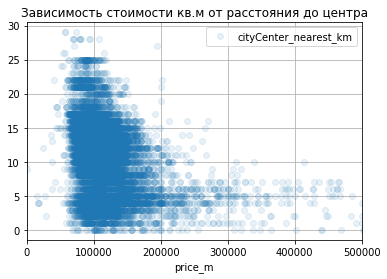

In [53]:
#построим график зависимости стоимости квадратного метра от расстояния до центра
df[df['locality_name'] == 'санкт-петербург'].plot(x = 'price_m', y = 'cityСenter_nearest_km',\
                                                  xlim=(0, 500000), grid = True, style = 'o',\
                                                  alpha =(0.1) )
plt.title('Зависимость стоимости кв.м от расстояния до центра')

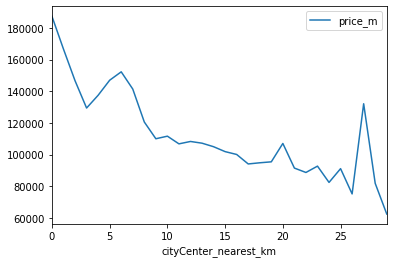

In [54]:
df[df['locality_name'] == 'санкт-петербург'].pivot_table\
(index = 'cityСenter_nearest_km', values = 'price_m', aggfunc = 'mean').plot()

По графику хорошо видно, что на 7 км резко пропадают объявления с высокой ценой. Будем считать, что областной центр в пределах 7 км.
И на графике также видно, что чем дальше от центра, тем меньше цена. Что и логично

задание:
    Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?
    

In [55]:
centr_sp = df[(df['locality_name'] == 'санкт-петербург') & (df['cityСenter_nearest_km'] <= 7)]

In [56]:
total_sp =  df[(df['locality_name'] == 'санкт-петербург')]

In [ ]:
total_sp[['good_last_price','good_total_area','good_rooms','good_days_exposition']].describe()

При анализе предложений в центре Питера и во всем Питере, мы видим, что цена дороже и больше площадь предлагаемых квартир, при этом количество комнат не отличаются значительно.

In [ ]:
centr_sp[['good_last_price','cityСenter_nearest_km','good_rooms','year_exposition']].corr()

In [ ]:
total_sp[['good_last_price','cityСenter_nearest_km','good_rooms','year_exposition']].corr()

В центре города цена зависит от количества комнат и практически не зависит от года размещения, аналогично и во всем Питере. Тут очевидно, как и предполагалось, что цена в центре выше от того, что в центре) .

In [ ]:
### Шаг 5. Общий вывод

Подводя итоги, выяснили, что основная масса предложений находится в Санкт-Петербурге. Цена зависит от экономической ситуации в стране, а также от приближенности к северной Столице. Люди реже хотят покупать квартиры на 1 этаже и предпочитают жить повыше. Больше всего предложений 1 и 2 комнатных квартир. Также, в самом Питере, все, что находится в центре значительно дороже. Квартиры в среднем продают до 3 месяцев